# FORWARD 

Our team organized the project such that we cleaned, filtered, and analyzed one streaming platform each. As such, we feel organizing by streaming platform datasets (as opposed to order of operations - e.g. all cleaning, all analysis, etc.) is the most reflective of our work process.

Since the Disney+ and Netflix notebooks were originally run in separate notebooks, their code is shown below but their output is not in the notebook. To see the original notebook (with outputs run in each notebook), please refer to the additional notebook folder. To see those platforms' final outputs, please refer to the Images or Resources folder.

# Hulu Data and Analysis

MERGING AND DATA CLEANING

In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statistics import mode
from statistics import mean
from statistics import median

import collections

In [2]:
# pull in the hulu csv as df

hulu_path = "/Users/emilyye/Downloads/hulu_titles.csv"

hulu_data = pd.read_csv(hulu_path)

In [3]:
# the original csv file categorizes some duration/runtime values into the Ratings column. Reassign them to the appropriate rows in the duration/runtime column.

for index, element in enumerate(hulu_data['rating']):
    if 'min' in str(element):
        hulu_data.loc[index,'duration'] = hulu_data.loc[index,'rating']
        hulu_data.loc[index,'rating'] = 'NaN'
    if 'Seasons' in str(element):
        hulu_data.loc[index,'duration'] = hulu_data.loc[index,'rating']
        hulu_data.loc[index,'rating'] = 'NaN'
    if 'Season' in str(element):
        hulu_data.loc[index,'duration'] = hulu_data.loc[index,'rating']
        hulu_data.loc[index,'rating'] = 'NaN'


In [4]:
# pull in the general streaming show data as dfs

gen_path_one = "/Users/emilyye/Downloads/tv_shows.csv"

gen_path_two = "/Users/emilyye/Downloads/MoviesOnStreamingPlatforms_updated.csv"

gen_data_one = pd.read_csv(gen_path_one)
gen_data_two = pd.read_csv(gen_path_two)


In [5]:
#merge the three dataframes into one
gen_master = pd.merge(gen_data_one, gen_data_two, on = "Title", how="outer")

hulu_data = hulu_data.rename(columns = {"title":"Title"})

master_db = pd.merge(gen_master, hulu_data, on = "Title", how = "outer")

# remove unnecessary columns (as agreed upon with project group)
del master_db["Unnamed: 0_x"]
del master_db["ID_x"]

del master_db["Unnamed: 0_y"]
del master_db["show_id"]
del master_db["cast"]


# create a dataframe from the master that is exclusive to Hulu

hulu_x = master_db.loc[master_db["Hulu_x"] == 1.0]
hulu_y = master_db.loc[master_db["Hulu_y"] == 1.0]

hulu_merge = pd.merge(hulu_x, hulu_y, on="Title", how = "outer")

# format so that all values are strings
hulu_merge = hulu_merge.astype("string")
hulu_merge = hulu_merge.fillna(value="NaN")

In [6]:
# create a helper function to merge columns

def clean_columns(df, final_col, other_col):
    '''
    merge columns such that all possible non-null values across similar columns are consolidated into a single column
        df is the dataframe being used
        final_col is the main column
        other_col are the other similar columns from which to pull viable values to replace nulls in the main
    '''
    
    x = 0
    
    for x in range(len(df)):
       
        if df[final_col][x] == "NaN":
            df[final_col][x] = df[other_col[0]][x]
            try: 
                if df[other_col[0]][x] == "NaN":
                    df[final_col][x] == df[other_col[1]][x]
                    if (df[(other_col[1])][x] == "NaN"):
                        df[final_col][x] == df[(other_col[2])][x]
                        if (df[(other_col[2])][x] == "NaN"):
                            try: 
                                df[final_col][x] = df[(other_col[3])][x]
                                if (df[(other_col[3])][x] == "NaN"):
                                    try: 
                                        df[final_col][x] = df[(other_col[4])][x]
                                    except:
                                        df[final_col][x] = df[(other_col[3])][x]
                            except:
                                df[final_col][x] == df[(other_col[2])][x]
            except:
                df[final_col][x] = df[other_col[0]][x]
                        
    return df[final_col]

In [7]:
# merge
hulu_merge["Type (Clean)"] = clean_columns(hulu_merge, "type_x", ["type_y","Type_y_x","Type_x_x","Type_y_x"])

hulu_merge["Director"] = clean_columns(hulu_merge, "Directors_x",["director_x","Directors_y","director_y"])

hulu_merge["Country"] = clean_columns(hulu_merge, "Country_x",["country_x","country_y","Country_y"])

hulu_merge["Rotten Tomatoes"] = clean_columns(hulu_merge, "Rotten Tomatoes_x_x",["Rotten Tomatoes_x_y","Rotten Tomatoes_y_x","Rotten Tomatoes_y_y"])

hulu_merge["IMDB"] = clean_columns(hulu_merge, "IMDb_x_x",["IMDb_y_x","IMDb_x_y","IMDb_y_y"])

hulu_merge["Age"] = clean_columns(hulu_merge, "Age_x_x",["Age_x_y","Age_y_y","Age_y_x"])

hulu_merge["Netflix"] = clean_columns(hulu_merge, "Netflix_x_x",["Netflix_x_y","Netflix_y_x","Netflix_y_y"])

hulu_merge["Hulu"] = clean_columns(hulu_merge, "Hulu_x_x",["Hulu_x_y","Hulu_y_y","Hulu_y_x"])

hulu_merge["Prime Video"] = clean_columns(hulu_merge, "Prime Video_x_x",["Prime Video_x_y","Prime Video_y_y","Prime Video_y_x"])

hulu_merge["Disney+"] = clean_columns(hulu_merge, "Disney+_x_x",["Disney+_x_y","Disney+_y_x","Disney+_y_y"])

hulu_merge["Year"] = clean_columns(hulu_merge, "Year_x_x",["Year_x_y","Year_y_x","Year_y_y", "release_year_x", "release_year_y"])

hulu_merge["Genre"] = clean_columns(hulu_merge, "Genres_y",["listed_in_x","listed_in_y", "Genres_x"])

hulu_merge["ID"] = clean_columns(hulu_merge, "ID_y_x",["ID_y_y"])

hulu_merge["Language"] = clean_columns(hulu_merge, "Language_x",["Language_y"])

hulu_merge["Runtime"] = clean_columns(hulu_merge, "Runtime_x",["Runtime_y","duration_x","duration_y"])

hulu_merge["Date Added"] = clean_columns(hulu_merge, "date_added_x",["date_added_y"])

hulu_merge["Description"] = clean_columns(hulu_merge, "description_x",["description_y"])

hulu_merge["Rating"] = clean_columns(hulu_merge, "rating_x", ["rating_y"])


In [8]:
# delete unneeded columns as agreed upon by group
del hulu_merge["Directors_x"]
del hulu_merge["director_x"]
del hulu_merge["Directors_y"]
del hulu_merge["director_y"]

del hulu_merge["Rotten Tomatoes_x_x"]
del hulu_merge["Rotten Tomatoes_x_y"]
del hulu_merge["Rotten Tomatoes_y_x"]
del hulu_merge["Rotten Tomatoes_y_y"]

del hulu_merge["IMDb_x_x"]
del hulu_merge["IMDb_x_y"]
del hulu_merge["IMDb_y_x"]
del hulu_merge["IMDb_y_y"]

del hulu_merge["Age_x_x"]
del hulu_merge["Age_x_y"]
del hulu_merge["Age_y_x"]
del hulu_merge["Age_y_y"]

del hulu_merge["Netflix_x_x"]
del hulu_merge["Netflix_x_y"]
del hulu_merge["Netflix_y_x"]
del hulu_merge["Netflix_y_y"]

del hulu_merge["Hulu_x_x"]
del hulu_merge["Hulu_x_y"]
del hulu_merge["Hulu_y_x"]
del hulu_merge["Hulu_y_y"]

del hulu_merge["Prime Video_x_x"]
del hulu_merge["Prime Video_x_y"]
del hulu_merge["Prime Video_y_x"]
del hulu_merge["Prime Video_y_y"]

del hulu_merge["Disney+_x_x"]
del hulu_merge["Disney+_x_y"]
del hulu_merge["Disney+_y_x"]
del hulu_merge["Disney+_y_y"]

del hulu_merge["Year_x_x"]
del hulu_merge["Year_x_y"]
del hulu_merge["Year_y_x"]
del hulu_merge["Year_y_y"]
del hulu_merge["release_year_x"]
del hulu_merge["release_year_y"]

del hulu_merge["Genres_x"]
del hulu_merge["Genres_y"]
del hulu_merge["listed_in_y"]
del hulu_merge["listed_in_x"]

del hulu_merge["ID_y_x"]
del hulu_merge["ID_y_y"]

del hulu_merge["Country_x"]
del hulu_merge["country_x"]
del hulu_merge["Country_y"]
del hulu_merge["country_y"]


del hulu_merge["rating_x"]
del hulu_merge["rating_y"]

del hulu_merge["Language_x"]
del hulu_merge["Language_y"]

del hulu_merge["Runtime_x"]
del hulu_merge["duration_x"]
del hulu_merge["Runtime_y"]
del hulu_merge["duration_y"]

del hulu_merge["date_added_y"]
del hulu_merge["date_added_x"]

del hulu_merge["description_y"]
del hulu_merge["description_x"]

del hulu_merge["Type_x_y"]
del hulu_merge["Type_x_x"]
del hulu_merge["type_x"]
del hulu_merge["Type_y_y"]
del hulu_merge["type_y"]
del hulu_merge["Type_y_x"]


In [9]:
# drop entries that are null across all column values
hulu_merge = hulu_merge.dropna(how="all")


In [10]:
# create a helper function to get rid of any NaNs later on
def nan_remover(input_list):
    '''
    loop through a provided list to see if the list contains nans
    if it does, nan_remover will remove the nans and return a new list
    '''
    # check for nulls or NaNs
    nan_check = [x for x in input_list if np.isnan(x) == True]
    
    nan_removed = [] 
    
    if len(nan_check) == 0:
        return "No nulls found"
    if len(nan_check) > 0:
        for value in input_list:
            if np.isnan(value) == False:
                nan_removed.append(value)
    return nan_removed

In [11]:
# rename columns
hulu_merge = hulu_merge.rename(columns = {
    "Type (Clean)": "Type",
    "Rotten Tomatoes": "Rotten Tomatoes Rating",
    "IMDB": "IMDB Rating",
    "Age": "Advisory Age",
    "Rating": "Advisory Rating"
})

MOVIE STATISTICS AND ANALYSIS

In [12]:
# Begin analyzing the cleaned data based on medium (movie or tv show)

# check the values by which to bifurcate the data

check = hulu_merge.loc[hulu_merge["Type"] != "NaN"]
print(check["Type"].value_counts())

TV Show    822
Movie      684
Name: Type, dtype: Int64


In [13]:
# general data on Hulu movies
movies = hulu_merge.loc[hulu_merge["Type"] == "Movie"]
movies = movies.reset_index()

# total number of offerings
total_offerings = len(movies)

# duration - mean, min, max

moviest = movies.loc[movies["Runtime"] != "NaN"]

mean_duration = moviest["Runtime"].astype(float).mean()
min_duration = moviest["Runtime"].astype(float).min()
max_duration = moviest["Runtime"].astype(float).max()

print(f'''
{mean_duration}
{min_duration}
{max_duration}
''')

# breadth of offering? # of subcategories etc.

    # pull out all values into a list
draft_cat = []

x=0
for x in range(len(movies)):
    draft_cat.append(movies["Genre"][x])

unique_cat = set(draft_cat)
unique_cat = list(unique_cat)

    # split the list values into individual sub categories
split_cat = []

for i in range(len(unique_cat)):
    split_cat.append(unique_cat[i].split(","))

    # un-nest the list of lists into one list
    
final_cat = [val for cat in split_cat for val in cat]
final_cat = set(final_cat)
final_cat = list(final_cat)

final_cat

# map out which movies are in which categories

cat_df = pd.DataFrame()

for x in final_cat:
    cat_df[x] = movies["Genre"].str.contains(x)

# count the number of movies Hulu has in every category

count = 0
cat_count = {}

for col in cat_df:
    for x in cat_df[col]:
        if x == True:
            count+=1
    cat_count[col] = count
    count = 0

print(cat_count)



97.66398713826366
5.0
174.0

{' Thriller': 5, 'Anime': 9, ' Lifestyle & Culture': 1, ' Reality': 1, 'Mystery': 69, ' Drama': 15, 'War': 16, 'History': 29, 'Romance': 125, 'Film-Noir': 1, 'Documentary': 104, 'Action': 105, 'Western': 12, ' History': 1, ' Horror': 3, ' Mystery': 1, 'Drama': 356, 'Adventure': 78, 'Music': 45, 'Fantasy': 55, ' Science Fiction': 1, ' Health & Wellness': 1, 'Animation': 31, 'Biography': 52, 'Crime': 89, 'Sports': 5, ' Anime': 2, ' International': 10, 'Musical': 9, 'Sci-Fi': 70, 'Sport': 21, 'Comedy': 194, 'Kids': 3, 'Horror': 111, ' LGBTQ+': 1, ' Kids': 2, 'Cooking & Food': 1, 'Thriller': 179, ' Sitcom': 4, ' Crime': 1, ' Comedy': 2, 'Family': 44, 'Reality': 3, 'Short': 8, ' Adventure': 8, 'News': 1, 'Documentaries': 3, ' Romance': 3}


In [14]:
# critical reception

    #rotten tomatoes and imdb values as lists
rt = [rating for rating in movies['Rotten Tomatoes Rating']]
imdb = [score for score in movies['IMDB Rating']]

    # RT - pull out the numerator for aggregation/analysis later on
rt_split = []
for num in rt:
    rt_split.append(num.split('/'))

final_rt = [float(val[0]) for val in rt_split]

rt_nn = nan_remover(final_rt)

    #IMDB - pull out the num for aggregation/analysis later on

imdb_split = []
for num in imdb:
    imdb_split.append(num.split('/'))

final_imdb = [float(imdb[0]) for imdb in imdb_split]

imdb_nn = nan_remover(final_imdb)

    # mean, median, mode for imdb and rt scores for hulu movies overall
imdb_mean = mean(imdb_nn)
imdb_median = median(imdb_nn)
imdb_mode = mode(imdb_nn)

rt_mean = mean(rt_nn)
rt_median = median(rt_nn)
rt_mode = mode(rt_nn)


In [15]:
# print out the summary statistics for movies overall

print(f'''

TOTAL NUMBER OF OFFERINGS

{total_offerings}

DURATION

Mean: {mean_duration} Min: {min_duration} Max: {max_duration}

BREADTH OF GENRES

{cat_count}

CRITICAL RECEPTION

IMDB -- Mean: {imdb_mean} Median: {imdb_median} Mode: {imdb_mode}

Rotten Tomatoes -- Mean: {rt_mean} Median: {rt_median} Mode: {rt_mode} 

''')



TOTAL NUMBER OF OFFERINGS

684

DURATION

Mean: 97.66398713826366 Min: 5.0 Max: 174.0

BREADTH OF GENRES

{' Thriller': 5, 'Anime': 9, ' Lifestyle & Culture': 1, ' Reality': 1, 'Mystery': 69, ' Drama': 15, 'War': 16, 'History': 29, 'Romance': 125, 'Film-Noir': 1, 'Documentary': 104, 'Action': 105, 'Western': 12, ' History': 1, ' Horror': 3, ' Mystery': 1, 'Drama': 356, 'Adventure': 78, 'Music': 45, 'Fantasy': 55, ' Science Fiction': 1, ' Health & Wellness': 1, 'Animation': 31, 'Biography': 52, 'Crime': 89, 'Sports': 5, ' Anime': 2, ' International': 10, 'Musical': 9, 'Sci-Fi': 70, 'Sport': 21, 'Comedy': 194, 'Kids': 3, 'Horror': 111, ' LGBTQ+': 1, ' Kids': 2, 'Cooking & Food': 1, 'Thriller': 179, ' Sitcom': 4, ' Crime': 1, ' Comedy': 2, 'Family': 44, 'Reality': 3, 'Short': 8, ' Adventure': 8, 'News': 1, 'Documentaries': 3, ' Romance': 3}

CRITICAL RECEPTION

IMDB -- Mean: 7.211320754716981 Median: 7.4 Mode: 7.8

Rotten Tomatoes -- Mean: 54.56140350877193 Median: 54.0 Mode: 51.0 




In [16]:
# delete more columns based on group agreement
del hulu_merge["Description"]
del hulu_merge["Prime Video"]
del hulu_merge["ID"]

TV SHOW STATISTICS AND ANALYSIS

In [17]:
tv_show = hulu_merge.loc[hulu_merge["Type"] == "TV Show"]

# total number of offerings

tv_offerings = len(tv_show)

# duration - mean, min, max

tv_showd = tv_show.loc[tv_show["Runtime"] != "NaN"]

mean_duration_tvd = tv_show["Runtime"].astype(float).mean()
min_duration_tvd = tv_show["Runtime"].astype(float).min()
max_duration_tvd = tv_show["Runtime"].astype(float).max()


# breadth of offering # of subcategories etc.

tv_showg = tv_show.loc[tv_show["Genre"]!="NaN"]

    # pull out all values into a list
draft_cat_tv = []

tv_showg["Genre"][8]

for genre in tv_showg["Genre"]:
    draft_cat_tv.append(genre)

unique_cat_tv = set(draft_cat_tv)
unique_cat_tv = list(unique_cat_tv)

     # split the list values into individual sub categories
split_cat_tv = []

for genre in unique_cat_tv:
    split_cat_tv.append(genre.split(","))

     # un-nest the list of lists into one list
    
final_cat_tv = [val for cat in split_cat for val in cat]
final_cat_tv = set(final_cat_tv)
final_cat_tv = list(final_cat_tv)

final_cat_tv

# # map out which movies are in which categories

cat_df_tv = pd.DataFrame()

for x in final_cat_tv:
    cat_df_tv[x] = tv_show["Genre"].str.contains(x)

cat_df_tv
# # count the number of movies Hulu has in every category

count_tv = 0
cat_count_tv = {}

for col in cat_df_tv:
    for x in cat_df_tv[col]:
        if x == True:
            count_tv+=1
    cat_count_tv[col] = count_tv
    count_tv = 0

print(cat_count_tv)


{' Thriller': 17, 'Anime': 127, ' Lifestyle & Culture': 42, ' Reality': 97, 'Mystery': 30, ' Drama': 166, 'War': 0, 'History': 19, 'Romance': 33, 'Film-Noir': 0, 'Documentary': 0, 'Action': 148, 'Western': 0, ' History': 19, ' Horror': 31, ' Mystery': 30, 'Drama': 274, 'Adventure': 154, 'Music': 15, 'Fantasy': 0, ' Science Fiction': 35, ' Health & Wellness': 3, 'Animation': 25, 'Biography': 0, 'Crime': 85, 'Sports': 11, ' Anime': 79, ' International': 83, 'Musical': 0, 'Sci-Fi': 0, 'Sport': 11, 'Comedy': 220, 'Kids': 38, 'Horror': 33, ' LGBTQ+': 8, ' Kids': 33, 'Cooking & Food': 28, 'Thriller': 17, ' Sitcom': 93, ' Crime': 20, ' Comedy': 84, 'Family': 83, 'Reality': 133, 'Short': 0, ' Adventure': 127, 'News': 10, 'Documentaries': 90, ' Romance': 32}


In [18]:
# critical reception

    #rotten tomatoes and imdb values as lists
rt_tv = [rating for rating in tv_show['Rotten Tomatoes Rating']]
imdb_tv = [score for score in tv_show['IMDB Rating']]

    # RT - pull out the numerator for aggregation/analysis later on
rt_split_tv = []
for num in rt_tv:
    rt_split_tv.append(num.split('/'))

final_rt_tv = [float(val[0]) for val in rt_split_tv]

rttv_nn = nan_remover(final_rt_tv)

    #IMDB - pull out the num for aggregation/analysis later on

imdb_split_tv = []
for num in imdb_tv:
    imdb_split_tv.append(num.split('/'))

final_imdb_tv = [float(imdb[0]) for imdb in imdb_split_tv]

imdbtv_nn = nan_remover(final_imdb_tv)

    # mean, median, mode for imdb and rt scores for hulu movies overall
imdb_mean_tv = mean(imdbtv_nn)
imdb_median_tv = median(imdbtv_nn)
imdb_mode_tv = mode(imdbtv_nn)

rt_mean_tv = np.mean(rttv_nn)
rt_median_tv = median(rttv_nn)
rt_mode_tv = mode(rttv_nn)

In [19]:
# print the summ stats for tv shows

print(f'''

TOTAL NUMBER OF OFFERINGS

{tv_offerings}

DURATION

Mean: {mean_duration_tvd} Min: {min_duration_tvd} Max: {max_duration_tvd}

BREADTH OF GENRES

{cat_count_tv}

CRITICAL RECEPTION

IMDB -- Mean: {imdb_mean_tv} Median: {imdb_median_tv} Mode: {imdb_mode_tv}

Rotten Tomatoes -- Mean: {rt_mean_tv} Median: {rt_median_tv} Mode: {rt_mode_tv} 

''')



TOTAL NUMBER OF OFFERINGS

822

DURATION

Mean: 22.0 Min: 22.0 Max: 22.0

BREADTH OF GENRES

{' Thriller': 17, 'Anime': 127, ' Lifestyle & Culture': 42, ' Reality': 97, 'Mystery': 30, ' Drama': 166, 'War': 0, 'History': 19, 'Romance': 33, 'Film-Noir': 0, 'Documentary': 0, 'Action': 148, 'Western': 0, ' History': 19, ' Horror': 31, ' Mystery': 30, 'Drama': 274, 'Adventure': 154, 'Music': 15, 'Fantasy': 0, ' Science Fiction': 35, ' Health & Wellness': 3, 'Animation': 25, 'Biography': 0, 'Crime': 85, 'Sports': 11, ' Anime': 79, ' International': 83, 'Musical': 0, 'Sci-Fi': 0, 'Sport': 11, 'Comedy': 220, 'Kids': 38, 'Horror': 33, ' LGBTQ+': 8, ' Kids': 33, 'Cooking & Food': 28, 'Thriller': 17, ' Sitcom': 93, ' Crime': 20, ' Comedy': 84, 'Family': 83, 'Reality': 133, 'Short': 0, ' Adventure': 127, 'News': 10, 'Documentaries': 90, ' Romance': 32}

CRITICAL RECEPTION

IMDB -- Mean: 7.195316455696203 Median: 7.4 Mode: 7.8

Rotten Tomatoes -- Mean: 60.31219512195122 Median: 61.0 Mode: 59.0 



PLOTS

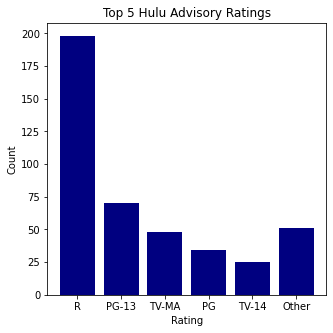

In [20]:
# most frequent advisory ratings (top 5 + other)

# by movie
adRatings = movies["Advisory Rating"].value_counts()
y_axis = [198,70,48,34,25,sum(adRatings[5:])]
x_axis = ['R','PG-13','TV-MA','PG','TV-14','Other']


plt.figure(figsize = (5,5))

plt.bar(x_axis, y_axis, color = 'navy')
plt.xlabel("Rating")
plt.ylabel("Count")
plt.title("Top 5 Hulu Advisory Ratings")

plt.savefig('adv_ratings_movies.png')

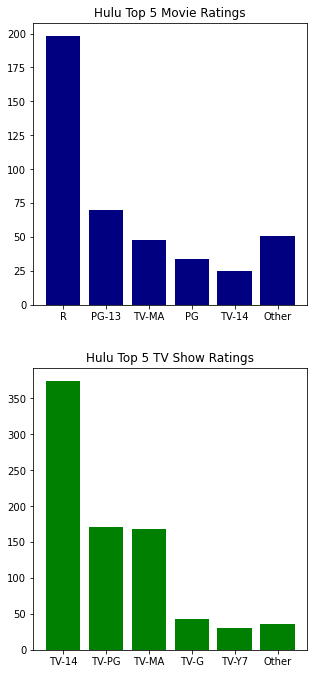

In [21]:
# by movie and show on one figure

adRatings = movies["Advisory Rating"].value_counts()

y_axis = [198,70,48,34,25,sum(adRatings[5:])]
x_axis = ['R','PG-13','TV-MA','PG','TV-14','Other']

adRat_tv = tv_show["Advisory Rating"].value_counts()

adratTV_y = [374, 171, 168, 43, 30, 36]
adratTV_x = ['TV-14','TV-PG','TV-MA','TV-G','TV-Y7','Other']

fig, axs = plt.subplots(2,figsize=(5,10))
axs[0].bar(x_axis, y_axis, color = 'navy')
axs[1].bar(adratTV_x, adratTV_y, color = 'green')

axs[0].set_title("Hulu Top 5 Movie Ratings")
axs[1].set_title("Hulu Top 5 TV Show Ratings")

fig.tight_layout(pad = 3)

fig

plt.savefig('adv_ratings_tv.png')

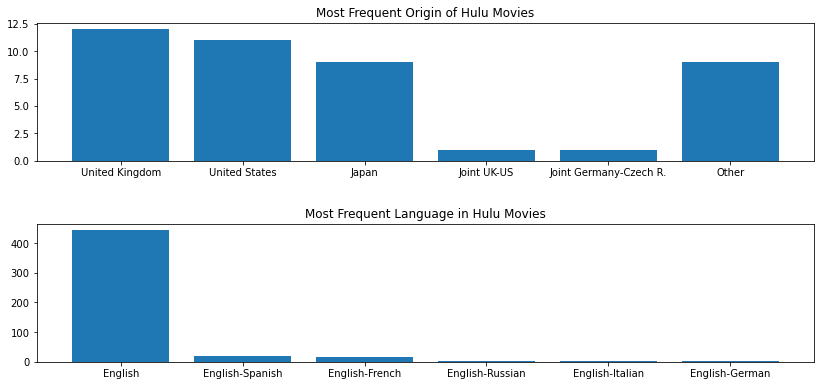

In [22]:
# double-bar chart by country and language

# by movie
ct_mov = movies["Country"].value_counts()
lang_mov = movies["Language"].value_counts()

ctmov_y = [12, 11, 9, 1, 1, sum(ct_mov[6:])]
ctmov_x = ['United Kingdom','United States','Japan','Joint UK-US','Joint Germany-Czech R.','Other']

langmov_y = [443,19,15,4,4,4]
langmov_x = ['English','English-Spanish','English-French','English-Russian','English-Italian','English-German']


fig, axs = plt.subplots(2,figsize=(12,6))
axs[0].bar(ctmov_x, ctmov_y)
axs[1].bar(langmov_x, langmov_y)

axs[0].set_title("Most Frequent Origin of Hulu Movies")
axs[1].set_title("Most Frequent Language in Hulu Movies")

fig.tight_layout(pad = 3)

In [23]:
# PIVOT - group decided not to graph these. 

# repeat the above for tv shows
# ct_tv = tv_show["Country"].value_counts()
# lang_tv = tv_show["Language"].value_counts()

# cttv_y = [446, 111, 49, 13, 9, sum(ct_mov[6:])]
# cttv_x = ['United States','Japan','United Kingdom','Canada','Joint US-Canada','Other']

# fig, axs = plt.subplots(2,figsize=(12,6))
# axs[0].bar(ctmov_x, ctmov_y)
# axs[1].bar(langmov_x, langmov_y)

# axs[0].set_title("Most Frequent Origin of Hulu Movies")
# axs[1].set_title("Most Frequent Language in Hulu Movies")

# fig.tight_layout(pad = 3)

# lang_tv

/var/folders/21/c38b7fjj2vd3z7p6w475vgz80000gn/T/ipykernel_99933/4199262552.py:13: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations. 
  fig.tight_layout(pad = 20)


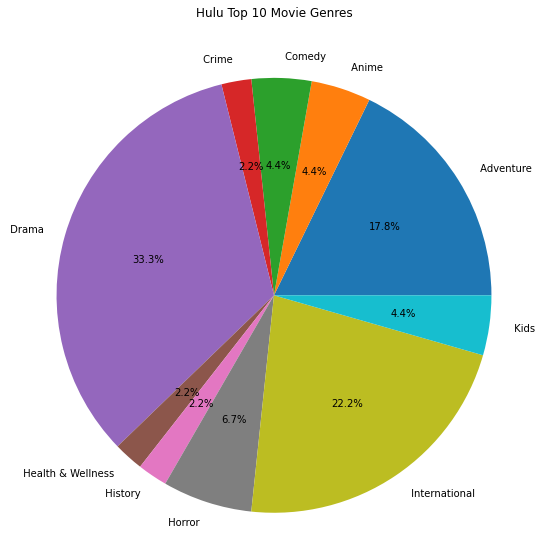

In [24]:
# genre niche of movies 
gen_mov_val = []
genmov_lab = []

sorted_cat_mov = sorted(cat_count.items())

for element in sorted_cat_mov[0:10]:
    gen_mov_val.append(element[1])
    genmov_lab.append(element[0])

plt.pie(gen_mov_val, labels = genmov_lab, autopct = "%1.1f%%", radius = 2.5)

fig.tight_layout(pad = 20)

plt.title('Hulu Top 10 Movie Genres', pad = 170)

plt.savefig('pc_hulu_mov.png')

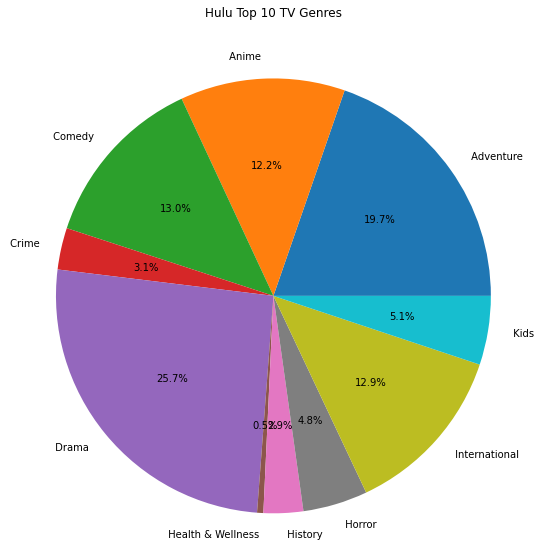

In [25]:
# genre niche of tv shows
gen_tv_val = []
gentv_lab = []

sorted_cat_tv = sorted(cat_count_tv.items())

for element in sorted_cat_tv[0:10]:
    gen_tv_val.append(element[1])
    gentv_lab.append(element[0])

plt.pie(gen_tv_val, labels = gentv_lab, autopct = "%1.1f%%", radius = 2.5)

plt.title('Hulu Top 10 TV Genres', pad = 170)

plt.savefig('pc_hulu.png')

Text(0.5, 1.0, 'Most Common Advisory Age Ratings for Hulu Movies')

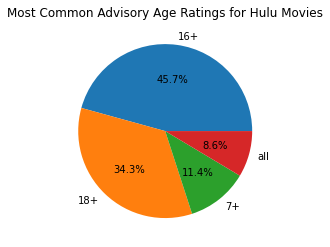

In [26]:
# count % of age advisory rating for movies and tv shows
ratage_mov = movies["Advisory Age"].value_counts()

ratage_count = [16, 12, 4, 3]
ratage_lab = ['16+','18+','7+','all']

plt.pie(ratage_count, labels = ratage_lab, autopct = "%1.1f%%", radius = 1)

plt.title('Most Common Advisory Age Ratings for Hulu Movies')

Text(0.5, 1.0, 'Most Common Advisory Age Ratings for Hulu TV Shows')

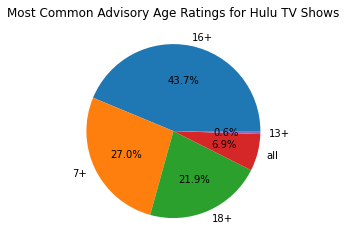

In [27]:
ratage_tv = tv_show["Advisory Age"].value_counts()
ratage_tv

ratage_count_tv = [318, 196, 159, 50, 4]
ratage_lab_tv = ['16+','7+','18+','all','13+']

plt.pie(ratage_count_tv, labels = ratage_lab_tv, autopct = "%1.1f%%", radius = 1)

plt.title('Most Common Advisory Age Ratings for Hulu TV Shows')

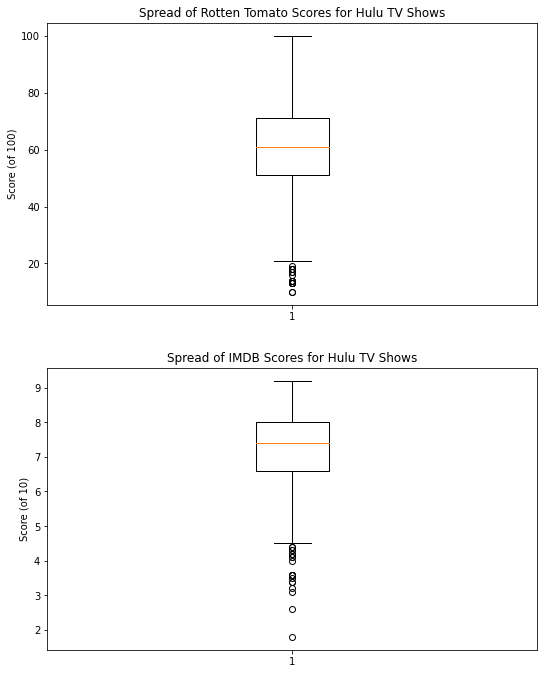

In [28]:
# box plt for critical reception (unused)

# for tv shows

fig, axs = plt.subplots(2,figsize=(8,10))
axs[0].boxplot(rttv_nn)
axs[1].boxplot(imdbtv_nn)

axs[0].set_title("Spread of Rotten Tomato Scores for Hulu TV Shows")
axs[1].set_title("Spread of IMDB Scores for Hulu TV Shows")

fig.tight_layout(pad = 3)

axs[0].set_ylabel('Score (of 100)')
axs[1].set_ylabel('Score (of 10)')

fig.savefig('RT and IMDB Scores for Hulu')

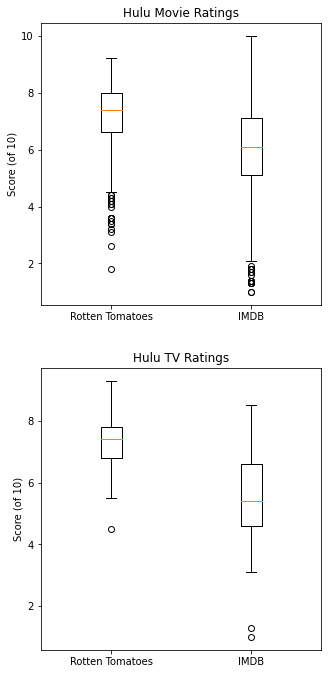

In [29]:
# plotting both movies and tv shows

# adjust so that imdb and rt scores are on the same scale
rt_nn = [x/10 for x in rt_nn]

rttv_nn = [x/10 for x in rttv_nn]

fig, axs = plt.subplots(2,figsize=(5,10))
axs[0].boxplot([imdbtv_nn, rttv_nn])
axs[1].boxplot([imdb_nn, rt_nn])

axs[0].set_title("Hulu Movie Ratings")
axs[1].set_title("Hulu TV Ratings")
axs[0].set_xticklabels(['Rotten Tomatoes','IMDB'])
axs[1].set_xticklabels(['Rotten Tomatoes','IMDB'])

fig.tight_layout(pad = 3)

axs[0].set_ylabel('Score (of 10)')
axs[1].set_ylabel('Score (of 10)')

fig.savefig('RT AND IMDB Scores FOR HULU')


Text(0, 0.5, 'Count')

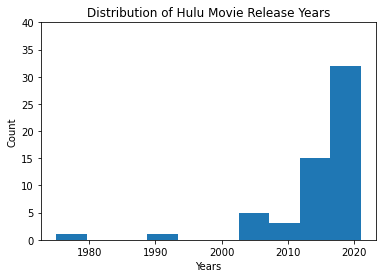

In [30]:
# graphing the date added and release year of movies
# (date added later cut from group analysis. chart later chanegd from bar to histogram, making variables with _keys and _count suffixes unused)

date_add = [x for x in movies['Date Added']]
date_add = set(date_add)
date_add = list(date_add)

split_date = []
for date in date_add:
    split_date.append(date.split(','))
    
year_added = [int(date[1]) for date in split_date]
year_added_occ = collections.Counter(year_added)
year_added_count = [float(x) for x in year_added_occ.values()]
year_added_keys = [x for x in year_added_occ.keys()]

year_rel = [float(x) for x in movies['Year'] if x != "NaN"]
year_rel_occ = collections.Counter(year_rel)
yr_rel_occ = sorted(year_rel_occ.items(), key=lambda pair: pair[0], reverse=False)

year_rel_count = [float(x[1]) for x in yr_rel_occ]
year_rel_keys = [x[0] for x in yr_rel_occ]
year_rel_keys = [float(x) for x in year_rel_keys]

plt.hist(year_rel)
plt.ylim(0,40)

plt.title('Distribution of Hulu Movie Release Years')
plt.xlabel('Years')
plt.ylabel('Count')

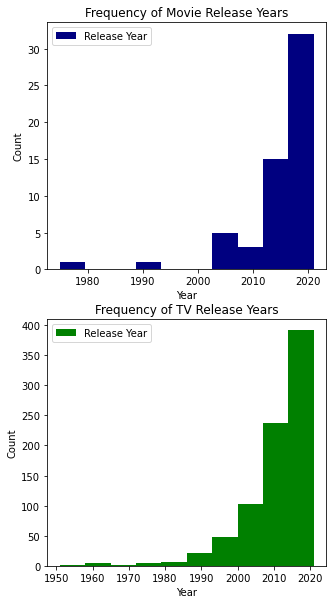

In [31]:
# date_add_tv = [x for x in tv_show['Date Added']]
# date_add_tv = set(date_add_tv)
# date_add_tv = list(date_add_tv)

# split_date_tv = []
# for date in date_add_tv:
#     if str(date) != 'NaN':
#         date.strip()
#         split_date_tv.append(str(date.split(',')))

# year_added = [date[1] for date in split_date]
# year_added_occ_tv = collections.Counter(year_added_tv)
# yr_added_occ = sorted(year_added_occ.items(), key=lambda pair: pair[0], reverse=False)
# year_added_count = [float(x) for x in year_added_occ.values()]
# year_added_keys = [float(x) for x in year_added_occ.keys()]

# the release year for tv show entries
year_rel_tv = [float(x) for x in tv_show['Year'] if x != "NaN"]
year_rel_occ_tv = collections.Counter(year_rel_tv)
yr_rel_occ_tv = sorted(year_rel_occ_tv.items(), key=lambda pair: pair[0], reverse=False)

year_rel_counttv = [x[1] for x in yr_rel_occ_tv]
year_rel_keystv = [x[0] for x in yr_rel_occ_tv]


# graphing the release years of movies and tv shows together on one figure

fig, axs = plt.subplots(2,figsize=(5,10))
axs[0].hist(year_rel, color = 'navy', label = 'Release Year')
axs[1].hist(year_rel_tv, color = 'green', label = 'Release Year')

axs[0].set_title("Frequency of Movie Release Years")
axs[1].set_title("Frequency of TV Release Years")

axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')


axs[0].set_xlabel('Year')
axs[1].set_xlabel('Year')

axs[0].legend(loc = 'best')
axs[1].legend(loc = 'best')

plt.savefig('HULU RELEASE SCHEDULE')


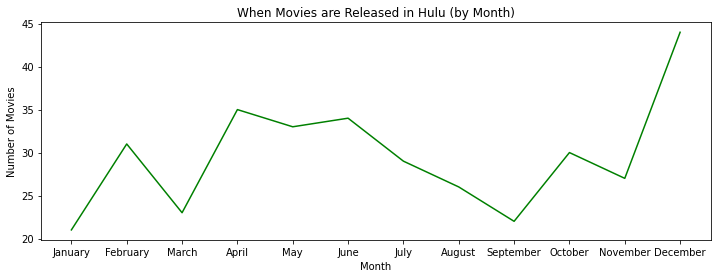

In [32]:
date_add = [x for x in movies['Date Added']]
date_add = set(date_add)
date_add = list(date_add)


split_date = []
for date in date_add:
    split_date.append(date.split(','))
  
split_date_2 = []
for date in date_add:
    split_date_2.append(date.split(' '))

month_added = [date[0] for date in split_date_2 if str(date) != "NaN"]
month_added_occ = collections.Counter(month_added)

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

count = []
for month in months:
    count.append(month_added_occ.get(month))

plt.figure(figsize=(12,4))
plt.plot(months, count, color = 'green')

plt.title("When Movies are Released in Hulu (by Month)")
plt.xlabel("Month")
plt.ylabel("Number of Movies")

plt.savefig('Month_Rel_Count.png')


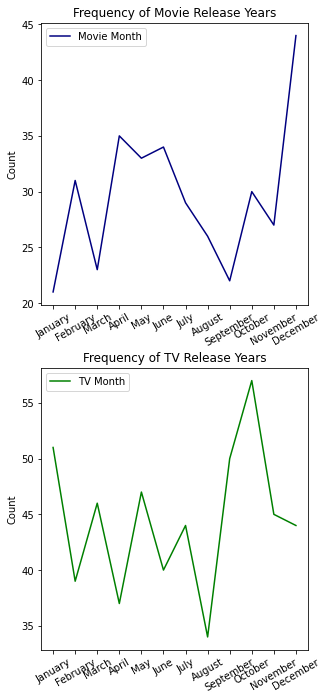

In [33]:
date_add = [x for x in tv_show['Date Added']]
date_add = set(date_add)
date_add = list(date_add)

split_date = []
for date in date_add:
    split_date.append(date.split(','))
  
split_date_2 = []
for date in date_add:
    split_date_2.append(date.split(' '))

month_added = [date[0] for date in split_date_2 if str(date) != "NaN"]
month_added_occ = collections.Counter(month_added)

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

count_tv = []
for month in months:
    count_tv.append(month_added_occ.get(month))

###
date_add = [x for x in movies['Date Added']]
date_add = set(date_add)
date_add = list(date_add)


split_date = []
for date in date_add:
    split_date.append(date.split(','))
  
split_date_2 = []
for date in date_add:
    split_date_2.append(date.split(' '))

month_added = [date[0] for date in split_date_2 if str(date) != "NaN"]
month_added_occ = collections.Counter(month_added)

months = ['January','February','March','April','May','June','July','August','September','October','November','December']

count = []
for month in months:
    count.append(month_added_occ.get(month))

###

fig, axs = plt.subplots(2,figsize=(5,10))
axs[0].plot(months, count, color = 'navy', label = "Movie Month")
axs[1].plot(months,count_tv, color = 'green', label = 'TV Month')

axs[0].set_title("Frequency of Movie Release Years")
axs[1].set_title("Frequency of TV Release Years")

fig.tight_layout(pad = 3)

axs[0].set_ylabel('Count')
axs[1].set_ylabel('Count')

plt.setp(axs[0].xaxis.get_majorticklabels(), rotation=30)
plt.setp(axs[1].xaxis.get_majorticklabels(), rotation=30)

axs[0].legend(loc = 'best')
axs[1].legend(loc = 'best')

plt.savefig('HULU RELEASE SCHEDULE')



# Disney+ Data and Analysis

MERGING AND DATA CLEANING

In [36]:
#variables for forloop
import_filenames = ['disney_plus_content_1.csv', 'disney_plus_content_2.csv', 'movies_per_streaming.csv', 'shows_per_streaming.csv']

#variable to store all df data
df_list = []

#importing data
for path in import_filenames:
    df_list.append(pd.read_csv(f"Resources/{path}"))

In [ ]:
#defining function for dropping columns
def dropper(df, drop_columns):
    df = df.drop(drop_columns, axis = 1)
    return df

In [ ]:
#variable for loop
df_column_list = [
    ['Imdb_Id', 'Plot', 'Released_At', 'Writer'],
    ['Show_Id', 'Description'],
    ['Unnamed: 0', 'Id', 'Netflix', 'Hulu', 'Prime Video'],
    ['Unnamed: 0', 'Id', 'Netflix', 'Hulu', 'Prime Video']
]

In [ ]:
#capitalizing and then dropping unnecessary columns
for i in range(len(df_list)):
    df_list[i].columns = map(str.title, df_list[i].columns)
    df_list[i] = dropper(df_list[i], df_column_list[i])

In [ ]:
#manually slicing of df2,3
for i in range(2,4):
    df_list[i] = df_list[i].loc[df_list[i]['Disney+'] == 1]
    df_list[i] = dropper(df_list[i], ['Disney+'])

In [ ]:
#merging all dfs
merged_df_01 = pd.merge(df_list[0], df_list[1], on = 'Title', how = 'outer')
merged_df_34 = pd.merge(df_list[2], df_list[3], on = 'Title', how = 'outer')
merged_df = pd.merge(merged_df_01, merged_df_34, on = 'Title', how = 'outer')
merged_df.head()

In [ ]:
#saving file for manual check
merged_df.to_csv('Resources/raw_merge_df.csv')

In [ ]:
#checking columns
print(merged_df.columns)

In [ ]:
#writing a function that cleanly combines 2 columns
def combined_2_columns(df, anchor_column, anchor_column_new_name, collapse_column, dropped_list, drop):
    '''
    anchor_column is the column series that you want everything to be compared to 
    anchor_column_new_name is the new name of that column
    collapse_column is the list of columns to combine
    dropped_list is an empty list that will track which values have NaN, used for debugging
    drop whether or not to drop the values
    '''
    # populate relevant column, and if no values then drop
    for i in range(len(df[anchor_column])):
        if (pd.isnull(df[anchor_column][i])):
            if (pd.isnull(df[collapse_column][i])):
                dropped_list.append(i)
                if (drop == True):
                    df = df.drop(i, axis = 0)
            else:
                df.loc[i, anchor_column] = df.loc[i, collapse_column]

    # fixing columns
    df.reset_index(inplace = True)
    df.drop([collapse_column, 'index'], axis = 1, inplace = True)
    df.rename(columns = {anchor_column : anchor_column_new_name}, inplace = True)
    if (drop == True):
        return print(f"Cleaning {anchor_column_new_name}, dropped {len(dropped_list)}.")
    else:
        return print(f"Cleaning {anchor_column_new_name}, has {len(dropped_list)} NaN's.")

In [ ]:
#writing functions for 3 columns
def combined_3_columns(df, anchor_column, anchor_column_new_name, collapse_column, dropped_list, drop):
    '''
    anchor_column is the column series that you want everything to be compared to 
    anchor_column_new_name is the new name of that column
    collapse_column is the list of columns to combine
    dropped_list is an empty list that will track which values have NaN, used for debugging
    drop whether or not to drop the values
    '''
    # populate relevant column, and if no values then drop
    for i in range(len(df[anchor_column])):
        if (pd.isnull(df[anchor_column][i])):
            if (pd.isnull(df[collapse_column[0]][i])):
                if (pd.isnull(df[collapse_column[1]][i])):
                    dropped_list.append(i)
                    if (drop == True):
                        df = df.drop(i, axis = 0)
                else:
                    df.loc[i, anchor_column] = df.loc[i, collapse_column[1]]
            else:
                df.loc[i, anchor_column] = df.loc[i, collapse_column[0]]

    # fixing columns
    df.reset_index(inplace = True)
    collapse_column.append('index')
    df.drop(collapse_column, axis = 1, inplace = True)
    df.rename(columns = {anchor_column : anchor_column_new_name}, inplace = True)
    if (drop == True):
        return print(f"Cleaning {anchor_column_new_name}, dropped {len(dropped_list)}.")
    else:
        return print(f"Cleaning {anchor_column_new_name}, has {len(dropped_list)} NaN's.")

In [ ]:
#writing functions for 4 columns
def combined_4_columns(df, anchor_column, anchor_column_new_name, collapse_column, dropped_list, drop):
    '''
    anchor_column is the column series that you want everything to be compared to 
    anchor_column_new_name is the new name of that column
    collapse_column is the list of columns to combine
    dropped_list is an empty list that will track which values have NaN, used for debugging
    drop whether or not to drop the values
    '''
    # populate relevant column, and if no values then drop
    for i in range(len(df[anchor_column])):
        if (pd.isnull(df[anchor_column][i])):
            if (pd.isnull(df[collapse_column[0]][i])):
                if (pd.isnull(df[collapse_column[1]][i])):
                    if (pd.isnull(df[collapse_column[2]][i])):
                        dropped_list.append(i)
                        if (drop == True):
                            df = df.drop(i, axis = 0)
                    else:
                        df.loc[i, anchor_column] = df.loc[i, collapse_column[2]]
                else:
                    df.loc[i, anchor_column] = df.loc[i, collapse_column[1]]
            else:
                df.loc[i, anchor_column] = df.loc[i, collapse_column[0]]

    # fixing columns
    df.reset_index(inplace = True)
    collapse_column.append('index')
    df.drop(collapse_column, axis = 1, inplace = True)
    df.rename(columns = {anchor_column : anchor_column_new_name}, inplace = True)
    if (drop == True):
        return print(f"Cleaning {anchor_column_new_name}, dropped {len(dropped_list)}.")
    else:
        return print(f"Cleaning {anchor_column_new_name}, has {len(dropped_list)} NaN's.")

In [ ]:
#writing function to chop off unnecessary strings
def str_fix(df, column_name, delimiter, output_type):
    '''
    df = the dataframe youre working in
    column_name = the column that you want to clean
    delimiter = the separator in the text
    output_type = str if string, float if float, no value if just want default type
    '''
    #variable
    str_values = []
    corrected_values = []
    typed_values = []
    
    #splitting
    str_values = df[column_name].values.astype(str).tolist()
    corrected_values = [value.split(delimiter, 1)[0] for value in str_values]

    #fixing the nans
    for i in range(len(corrected_values)):
        if (corrected_values[i] == 'nan'):
            corrected_values[i] = ''
            
    #assigning back
    df[column_name] = corrected_values
    if (output_type == 'str'):
        df[column_name] = df[column_name].astype(str)
    elif (output_type == 'float'):
        df[column_name] = pd.to_numeric(df[column_name], errors = 'coerce')
    else:
        df[column_name] = corrected_values
    
    #return
    return None

In [ ]:
#variables for for loop
anchor_ls = ['Age_x', 'Rated', 'Added_At', 'Rotten Tomatoes_x', 'Actors', 'Language_x', 'Runtime_x']
anchor_name_ls = ['Age Advisory Rating', 'Advisory Rating', 'Available to Public on', 'Rotten Tomatoes Score', 'Cast', 'Available Languages', 'Runtime']
column_ls = ['Age_y', 'Rating', 'Date_Added', 'Rotten Tomatoes_y', 'Cast', 'Language_y', 'Runtime_y']
boolean_ls = [False, False, False, False, False, False, False]

In [ ]:
#Age, Rating, Date Added, Rotten, IMDB, Cast, Languages
for i in range(len(anchor_ls)):
    dropped_list = [] #reseting for every df
    combined_2_columns(merged_df, anchor_ls[i], anchor_name_ls[i], column_ls[i], dropped_list, boolean_ls[i])

In [ ]:
print(merged_df.columns)

In [ ]:
#variables for for loop
anchor_ls = ['Genre', 'Director_x', 'Country_x', 'Imdb_Rating']
anchor_name_ls = ['Genre', 'Director', 'Country', 'IMDB Score']
column_ls = [['Listed_In', 'Genres'], ['Director_y', 'Directors'], ['Country_y', 'Country'], ['Imdb_x', 'Imdb_y']]
boolean_ls = [True, False, False, False]

In [ ]:
#Runtime, Genre, Director, Country
for i in range(len(anchor_ls)):
    dropped_list = [] #reseting for every df
    combined_3_columns(merged_df, anchor_ls[i], anchor_name_ls[i], column_ls[i], dropped_list, boolean_ls[i])

In [ ]:
print(merged_df.columns)

In [ ]:
#finding unique categorical values for Type
print(f"Unique categorical values are {merged_df['Type_x_x'].append(merged_df['Type_y_x']).append(merged_df['Type_x_y']).append(merged_df['Type_y_y']).unique()}")

#standardizing values
merged_df['Type_x_x'] = merged_df['Type_x_x'].str.title()
merged_df['Type_x_y'].replace(0, 'Movie', inplace = True)
merged_df['Type_y_y'].replace(1, 'TV Show', inplace = True)
merged_df['Type_x_x'].replace(['Series', 'Episode'], ['TV Show','TV Show'], inplace = True)

In [ ]:
#variables for for loop
anchor_ls = ['Type_x_x', 'Year']
anchor_name_ls = ['Offering Type', 'Year Released']
column_ls = [['Type_y_x', 'Type_x_y', 'Type_y_y'], ['Release_Year', 'Year_x', 'Year_y']]
boolean_ls = [True, False]

In [ ]:
#Type and Release Year
for i in range(len(anchor_ls)):
    dropped_list = [] #reseting for every df
    combined_4_columns(merged_df, anchor_ls[i], anchor_name_ls[i], column_ls[i], dropped_list, boolean_ls[i])

In [ ]:
print(merged_df.columns)

In [ ]:
#after manually reviewing file, still some cleaning to do
merged_df.dtypes

In [ ]:
#manual adjustment
merged_df.drop(['Type_y_x', 'Listed_In', 'Type_x_y', 'Genres', 'Type_y_y'], axis = 1, inplace = True)
merged_df.rename(columns = {'Type_x_x' : 'Offering Medium', 'Imdb_Votes' : 'IMDB Votes'}, inplace = True)

In [ ]:
#dropping the NaNs that didn't get picked up
for i in range(len(merged_df['Title'])):
    if (pd.isnull(merged_df.loc[i, 'Title']) | pd.isnull(merged_df.loc[i, 'Genre'])):
        merged_df.drop(i, axis = 0, inplace = True)

In [ ]:
#resetting index after drops
merged_df.reset_index(inplace = True)
merged_df.drop('index', axis = 1, inplace = True)

In [ ]:
merged_df['Duration'] = merged_df['Duration'].astype(str)
for i in range(len(merged_df['Duration'])):
    if ('Season' not in merged_df['Duration'][i]):
        merged_df.loc[i,'Duration'] = np.NaN

In [ ]:
#saving file for manual check
merged_df.to_csv('clean_merge_df.csv')

In [ ]:
#all floats
float_list = ['Runtime', 'IMDB Score', 'IMDB Votes', 'Duration', 'Rotten Tomatoes Score', 'Year Released']
delimiter_list = [' ', ' ', ' ', ' ', '/', '–']
type_list = ['float', 'float', 'float', 'float', 'float', 'str']
for i in range(len(float_list)):
    str_fix(merged_df, float_list[i], delimiter_list[i], type_list[i])

In [ ]:
#after group meeting, changed the column headers
merged_df = merged_df.rename(columns = {'Offering Medium' : 'Type',
                                        'Rotten Tomatoes Score' : 'Rotten Tomatoes Rating',
                                        'Year Released' : 'Year',
                                        'Available Languages' : 'Language',
                                        'Age Advisory Rating' : 'Advisory Age',
                                        'Available to Public on' : 'Date Added',
                                        'IMDB Score' : 'IMDB Rating',
                                       })

In [ ]:
#reroganizing column headers
print(merged_df.columns)
merged_df = merged_df[['Title', 'Type', 'Genre',
                       'Year', 'Date Added',
                       'Director', 
                       'Runtime', 'Duration',
                       'Country', 'Language',
                       'Rotten Tomatoes Rating', 'IMDB Rating',
                       'Advisory Rating', 'Advisory Age']]

In [ ]:
#prepping for mass merge
merged_df['Disney+'] = 1

In [ ]:
#minor cleaning
merged_df.loc[:,'Advisory Rating'].replace(['APPROVED','Not Rated', 'UNRATED', 'NOT RATED', 'PASSED'], ['Approved', 'Unrated', 'Unrated', 'Unrated', 'Passed'], inplace = True)
merged_df['Advisory Rating'].unique()

In [ ]:
#saving file for manual check
merged_df.to_csv('Resources/clean_merge_df.csv', index = False)

DISNEY+ ANALYSIS

In [ ]:
df = pd.read_csv('Resources/clean_merge_df.csv')
print(df.columns)
df.head()

In [ ]:
#manual cleaning for analyses
df['Month Added'] = df.loc[:,'Date Added'].str.split(' ', expand = True)[0]
df['Year Added'] = df.loc[:,'Date Added'].str.split(' ', expand = True)[2].str.strip()
df.head()

In [ ]:
#separating movies and tv shows
movie_df = df.loc[df['Type'] == 'Movie']
tv_df = df.loc[df['Type'] == 'TV Show']

In [ ]:
#extract function to pull out categorical data
def extract(df, input_column):
    return df.loc[:, input_column].dropna(axis = 0).str.split(',', expand = False).tolist()

In [ ]:
#flattening functions to allow for counting
def flatten(df, input_column):
    input_list = extract(df, input_column)
    return_list = []
    
    for i in range(len(input_list)):
        for j in range(len(input_list[i])):
            return_list.append(input_list[i][j].strip())
    return return_list

In [ ]:
#frequency counter function to count categorical data
def frequency(df, input_column):
    input_list = flatten(df, input_column)
    return_dict = {}
    
    for element in input_list:
        if (element in return_dict):
            return_dict[element] += 1
        else:
            return_dict[element] = 1
    return pd.Series(return_dict).sort_values(ascending = False)

In [ ]:
#keeps top five results of a frequency 
def top_five(df, input_column):
    input_series = frequency(df, input_column)
    
    input_series_x = input_series.index.tolist()[0:5]
    input_series_x.append('Other')
    
    input_series_y = input_series.values.tolist()
    other_sum = sum(input_series_y[5:-1])
    input_series_y = input_series_y[0:5]
    input_series_y.append(other_sum)

    return pd.Series(input_series_y, index = input_series_x)

In [ ]:
#keeps top five results of a frequency 
def top_ten(df, input_column):
    input_series = frequency(df, input_column)
    
    input_series_x = input_series.index.tolist()[0:10]
    input_series_x.append('Other')
    
    input_series_y = input_series.values.tolist()
    other_sum = sum(input_series_y[10:-1])
    input_series_y = input_series_y[0:10]
    input_series_y.append(other_sum)

    return pd.Series(input_series_y, index = input_series_x)

In [ ]:
#advisory ratings raw
advisory_rating_mov = top_five(movie_df, 'Advisory Rating')
advisory_rating_tv = top_five(tv_df, 'Advisory Rating')

In [ ]:
#plotting
fig, (gr0, gr1) = plt.subplots(2, 1, figsize = (5,10), sharey = True)

# fig.supxlabel("Most Frequent Adivsory Ratings on Disney+")
# fig.supylabel("Counts")
advisory_rating_mov.plot(kind = 'bar', ax = gr0, color = 'navy', label = 'Movie Counts')
advisory_rating_tv.plot(kind = 'bar', ax = gr1, color = 'green', label = 'TV Counts')
gr0.set_title("Disney+ Top 5 Movie Ratings")
gr1.set_title("Disney+ Top 5 TV Ratings")
plt.setp(gr0.xaxis.get_majorticklabels(), rotation=0)
plt.setp(gr1.xaxis.get_majorticklabels(), rotation=0)
gr0.legend(loc = 'best')
gr1.legend(loc = 'best')
plt.tight_layout()
plt.savefig("Images/Ratings.png")

In [ ]:
#advisory ratings raw
country_mov = top_five(movie_df, 'Country')
country_tv = top_five(tv_df, 'Country')
language_mov = top_five(movie_df, 'Language')
language_tv = top_five(tv_df, 'Language')

In [ ]:
#plotting
fig, ((gr0, gr1), (gr2, gr3)) = plt.subplots(2, 2, figsize = (10,10), sharey = True)
fig.suptitle("Disney+ Top 5 Country and Language Frequencies")
fig.supxlabel("Age Advisory Ratings")
fig.supylabel("Counts")
country_mov.plot(kind = 'bar', ax = gr0, color = 'navy', label = 'Movie Counts of Countries')
country_tv.plot(kind = 'bar', ax = gr1, color = 'green', label = 'TV Counts of Countries')
language_mov.plot(kind = 'bar', ax = gr2, color = 'blue', label = 'Movie Counts of Languages')
language_tv.plot(kind = 'bar', ax = gr3, color = 'teal', label = 'TV Counts of Languages')
gr0.legend(loc = 'best')
gr1.legend(loc = 'best')
gr2.legend(loc = 'best')
gr3.legend(loc = 'best')
plt.tight_layout()
plt.savefig("Images/Country_Ratings.png")

In [ ]:
#getting values
genre_mov = top_ten(movie_df, 'Genre')
genre_tv = top_ten(tv_df, 'Genre')

In [ ]:
#variables
explosion_values = [0.1,0,0,0,0,0,0,0,0,0,0]
color_values = ['white', 'crimson', 'orange', 'yellow', 'lawngreen', 'turquoise', 'deepskyblue', 'navy', 'darkviolet', 'deeppink', 'gray']

#plotting
plt.figure(figsize = (7,7))
plt.title("Disney+ Top 10 Movie Genres")
# plt.xlabel("Movies")
plt.pie(genre_mov.values.tolist(), labels = genre_mov.index.tolist(), explode = explosion_values, autopct = '%1.1f%%', shadow = True)
plt.tight_layout()
plt.savefig("Images/Genres1.png")

In [ ]:
#variables
explosion_values = [0.1,0,0,0,0,0,0,0,0,0,0]

#plotting
plt.figure(figsize = (7,7))
plt.title("Disney+ Top 10 TV Genres")
# plt.xlabel("TV Shows")
plt.pie(genre_tv.values.tolist(), labels = genre_tv.index.tolist(), explode = explosion_values, autopct = '%1.1f%%', shadow = True)
plt.tight_layout()
plt.savefig("Images/Genres2.png")

In [ ]:
#extracting information
age_mov = top_five(movie_df, 'Advisory Age')
age_tv = top_five(tv_df, 'Advisory Age')

In [ ]:
#variables
explosion_values = [0.1,0,0,0,0,0]
color_values = ['white', 'crimson', 'yellow', 'lawngreen', 'deepskyblue']

#plotting
plt.figure(figsize = (7,7))
plt.title("Disney+ Top 10 Age Groups")
plt.xlabel("Age Groups")
plt.pie(age_mov.values.tolist(), labels = age_mov.index.tolist(), explode = explosion_values, colors = color_values, autopct = '%1.1f%%', shadow = True)
plt.tight_layout()
plt.savefig("Images/Age1.png")

In [ ]:
#variables
explosion_values = [0.1,0,0,0,0]
color_values = ['white', 'crimson', 'yellow', 'lawngreen', 'deepskyblue']

#plotting
plt.figure(figsize = (7,7))
plt.title("Disney+ Top 10 Age Groups")
plt.xlabel("Age Groups")
plt.pie(age_tv.values.tolist(), labels = age_tv.index.tolist(), explode = explosion_values, colors = color_values, autopct = '%1.1f%%', shadow = True)
plt.tight_layout()
plt.savefig("Images/Age2.png")

In [ ]:
#plotting
fig, (gr0, gr1) = plt.subplots(2, 1, figsize = (5, 10))
# fig.suptitle("Disney+ Ratings")
fig.supxlabel("Ratings")
fig.supylabel("Score")
mov_data = [movie_df['IMDB Rating'].dropna(), movie_df['Rotten Tomatoes Rating'].dropna()/10]
tv_data = [tv_df['IMDB Rating'].dropna(), tv_df['Rotten Tomatoes Rating'].dropna()/10]

gr0.boxplot(mov_data, labels = ['IMDB', 'Rotten Tomatoes'])
gr0.set_title('Disney+ Movie Ratings')
gr1.boxplot(tv_data, labels = ['IMDB', 'Rotten Tomatoes'])
gr1.set_title('Disney+ TV Ratings')

plt.tight_layout()
plt.savefig("Images/BoxRatings.png")

In [ ]:
#plotting
fig, (gr0, gr1) = plt.subplots(2, 1, sharex = True, sharey = True, figsize = (5,10))
# # fig.suptitle("Disney+ Release Frequency by Year")
# fig.supxlabel("Year")
# fig.supylabel("Count")

mov_release_x = movie_df['Year'].value_counts().sort_index().index.astype(int).tolist()
mov_release_y = movie_df['Year'].value_counts().sort_index().values.astype(int).tolist()
mov_added_x = movie_df['Year Added'].value_counts().sort_index().index.astype(int).tolist()
mov_added_y = movie_df['Year Added'].value_counts().sort_index().values.astype(int).tolist()

tv_release_x = tv_df['Year'].value_counts().sort_index().index.astype(int).tolist()
tv_release_y = tv_df['Year'].value_counts().sort_index().values.astype(int).tolist()
tv_added_x = tv_df['Year Added'].value_counts().sort_index().index.astype(int).tolist()
tv_added_y = tv_df['Year Added'].value_counts().sort_index().values.astype(int).tolist()

gr0.hist(movie_df['Year'], bins = 5, color = 'navy', label = 'Release Year')
gr0.set_title("Disney+ Frequency of Movie Release Years")
gr1.set_title("Disney+ Frequency of TV Release Years")
gr1.hist(tv_df['Year'], bins = 5, color = 'green', label = 'Release Year')

gr0.legend(loc = 'upper left')
gr1.legend(loc = 'upper left')
plt.tight_layout
plt.savefig("Images/YearsReleaseAdded.png")

In [ ]:
#plotting
fig, (gr0, gr1) = plt.subplots(2, 1, figsize = (5,10), sharey = True)
# fig.suptitle("Disney+ Update Schedule")
# fig.supxlabel("Time")
# fig.supylabel("Counts")

months_labels = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
months_xticks = [1,2,3,4,5,6,7,8,9,10,11,12]

avail_mov_mon_y = movie_df['Month Added'].value_counts().tolist()
avail_mov_mon_x = movie_df['Month Added'].value_counts().index.tolist()
complete_mov_mon_x = avail_mov_mon_x
mapper_list = [months_labels.index(element) for element in complete_mov_mon_x]

complete_mov_mon_y = []
for i in range(len(months_labels)):
    if i in mapper_list:
        complete_mov_mon_y.append(avail_mov_mon_y[mapper_list.index(i)])
    else:
        complete_mov_mon_y.append(0)
    

gr0.plot(months_labels, complete_mov_mon_y, color = 'navy', label = 'Movie Month')
plt.setp(gr0.xaxis.get_majorticklabels(), rotation=30)

avail_tv_mon_y = tv_df['Month Added'].value_counts().tolist()
avail_tv_mon_x = tv_df['Month Added'].value_counts().index.tolist()
complete_tv_mon_x = avail_tv_mon_x
mapper_list = [months_labels.index(element) for element in complete_tv_mon_x]

complete_tv_mon_y = []
for i in range(len(months_labels)):
    if i in mapper_list:
        complete_tv_mon_y.append(avail_tv_mon_y[mapper_list.index(i)])
    else:
        complete_tv_mon_y.append(0)

gr1.plot(months_labels, complete_tv_mon_y, color = 'green', label = 'TV Month')
plt.setp(gr1.xaxis.get_majorticklabels(), rotation=30)

gr0.set_title("Disney+ Movie Update Schedule")
gr1.set_title("Disney+ TV Update Schedule")

gr0.legend(loc = 'best')
gr1.legend(loc = 'upper left')
plt.tight_layout()
plt.savefig("Images/MonthsReleaseAdded.png")

# NETFLIX DATA AND ANALYSIS

MERGING AND DATA CLEANING

In [ ]:
#load data into DataFrame (https://www.kaggle.com/ruchi798/movies-on-netflix-prime-video-hulu-and-disney)
movie_streaming_df = pd.read_csv("MoviesOnStreamingPlatforms_updated.csv")
movie_streaming_df['type'] = 'Movie'

#clean unnecessary columns
movie_streaming_df.drop(['Unnamed: 0', 'ID', 'Prime Video', 'Type'], axis = 1, inplace = True)

movie_streaming_df.rename(columns={'type': 'Type'}, inplace = True)

#filter dataframe to just movies on netflix
movie_netflix_filtered_df = movie_streaming_df.loc[(movie_streaming_df['Netflix'] == 1) &
                                                        (movie_streaming_df['Hulu'] == 0) &
                                                        (movie_streaming_df['Disney+'] == 0)]

movie_netflix_filtered_df.reset_index(inplace = True)
movie_netflix_filtered_df.columns

In [ ]:
#load data into DataFrame (https://www.kaggle.com/ruchi798/tv-shows-on-netflix-prime-video-hulu-and-disney)
tv_shows_streaming_df = pd.read_csv("tv_shows.csv")
tv_shows_streaming_df['type'] = 'TV Show'

del tv_shows_streaming_df['Type']

tv_shows_streaming_df.rename(columns={'type': 'Type'}, inplace = True)

#clean unnecessary columns
tv_shows_streaming_df.drop(['Unnamed: 0', 'ID', 'Prime Video'], axis = 1, inplace = True)

#filter dataframe to just tv_shows on netflix
tv_show_netflix_filtered_df = tv_shows_streaming_df.loc[(tv_shows_streaming_df['Netflix'] == 1) &
                                                        (tv_shows_streaming_df['Hulu'] == 0) &
                                                        ((tv_shows_streaming_df['Disney+'] == 0))]

tv_show_netflix_filtered_df.reset_index(inplace = True)
del tv_show_netflix_filtered_df['index']

tv_show_netflix_filtered_df

In [ ]:
#load netflix data into a DataFrame (https://www.kaggle.com/shivamb/netflix-shows)
netflix_df = pd.read_csv('netflix_titles.csv')

#Clean unnecessary columns
del netflix_df['show_id'], netflix_df['description'], netflix_df['cast']

netflix_df.rename(columns = {"title": "Title"}, inplace = True)

#separate into tv and movie dataframes
movie_netflix_df = netflix_df.loc[netflix_df['type'] == 'Movie']
tv_show_netflix_df = netflix_df.loc[netflix_df['type'] == 'TV Show']

#rename column to merge later
movie_netflix_df = movie_netflix_df.rename(columns = {"title": "Title"})

#movie_netflix_df.columns
netflix_df.columns

In [ ]:
#load netflix data into a DataFrame (https://www.kaggle.com/swapnilbhange/netflix-original-movies)

original_movies_netflix_df = pd.read_csv('netflix_original_movie_data.csv')
original_movies_netflix_df.columns

#clean unnecessary columns
original_movies_netflix_df.drop(['Unnamed: 0', 'Produced by', 'Screenplay by',
       'Based on', 'Music by', 'Cinematography', 'Edited by',
       'Production companies', 'Distributed by', 'Written by', 'Production company',
        'Starring', 'Budget', 'Box office', 'Budget.1', 'Box Office', 'metascore',
       'Story by', 'Narrated by', 'French', 'Spanish', 'Italian', 'Portuguese',
       'Animation by', 'Hangul', 'Revised Romanization', 'Japanese',
       'Literally', 'Turkish', 'Indonesian', 'German', 'Norwegian', 'Polish',
       'Music', 'Lyrics', 'Book', 'Basis', 'Productions'], axis=1, inplace=True)

original_movies_netflix_df['type'] = 'Movie'
original_movies_netflix_df.columns

In [ ]:
#Merging the dataframes (movie_netflix_df and netflix_filtered_df)
movie_merged_one_netflix_df = movie_netflix_df.merge(movie_netflix_filtered_df, how = 'outer', on = "Title")

#Merging the dataframes (merged_netflix_df and original_movies_netflix_df)
movie_merged_two_netflix_df = movie_merged_one_netflix_df.merge(original_movies_netflix_df, how = 'outer', on = 'Title')

#joining the show dataframes
tv_show_merged_netflix_df = tv_show_netflix_filtered_df.merge(tv_show_netflix_df, how = 'outer', on ='Title')

# final_merged_netflix_df = movie_merged_two_netflix_df.merge(tv_show_merged_netflix_df, how = 'outer', on = 'Title')

# final_merged_netflix_df = final_merged_netflix_df.reset_index()

# del final_merged_netflix_df['index'], final_merged_netflix_df['level_0']

# final_merged_netflix_df
movie_merged_two_netflix_df.head()

In [ ]:
movie_merged_two_netflix_df.columns

In [ ]:
#defining functions to clean data
"""
These functions check for NaN values in columns of the same category. If all columns are NaN, it clears the entire row
from the dataset. It will search through the relevant columns and pull the first value and set it as
the new collapsed column value 
"""

def three_column_cleaner(dataframe, column_1, column_2, column_3, new_column):
    for index, row in dataframe.iterrows():
        if pd.isnull(row[column_1]):
            if pd.isnull(row[column_2]):
                if pd.isnull(row[column_3]):
                    dataframe.drop(index, axis = 0, inplace = True)
                else:
                    dataframe.at[index, new_column] = row[column_3]
            else:
                dataframe.at[index, new_column] = row[column_2]
        else:
            dataframe.at[index, new_column] = row[column_1]
    del dataframe[column_1], dataframe[column_2], dataframe[column_3]
    dataframe.reset_index(inplace = True)
    del dataframe['index']    
            
def two_column_cleaner(dataframe, column_1, column_2, new_column):
    for index, row in dataframe.iterrows():
        if pd.isnull(row[column_1]):
            if pd.isnull(row[column_2]):
                dataframe.drop(index, axis = 0, inplace = True)
            else:
                dataframe.at[index, new_column] = row[column_2]
        else:
            dataframe.at[index, new_column] = row[column_1]
    del dataframe[column_1], dataframe[column_2]
    dataframe.reset_index(inplace = True)
    del dataframe['index']

In [ ]:
#Make a copy to clean the merged_df and work with
cleaned_movie_netflix_df = movie_merged_two_netflix_df.copy(deep = True)

#manually set the column value to 1.0, indicating that it is on netflix
cleaned_movie_netflix_df['Netflix'] = 1.0

In [ ]:
cleaned_movie_netflix_df.columns

In [ ]:
#clean director columns
three_column_cleaner(cleaned_movie_netflix_df, 'director', 'Directors', 'Directed by', 'Director')
print(len(cleaned_movie_netflix_df))

#clean country columns
three_column_cleaner(cleaned_movie_netflix_df, 'country', 'Country_x', 'Country_y', 'Country')
print(len(cleaned_movie_netflix_df))

#clean IMDB columns
two_column_cleaner(cleaned_movie_netflix_df, 'IMDb', 'imdb', 'IMDB Rating')
print(len(cleaned_movie_netflix_df))

#clean Rotten Tomatoes columns
two_column_cleaner(cleaned_movie_netflix_df, 'Rotten Tomatoes', 'rotten_tomatoes', 'Rotten Tomatoes Rating')
print(len(cleaned_movie_netflix_df))

#clean language columns
two_column_cleaner(cleaned_movie_netflix_df, 'Language_x', 'Language_y', 'Language')
print(len(cleaned_movie_netflix_df))

#clean genre columns
two_column_cleaner(cleaned_movie_netflix_df, 'Genres', 'listed_in', 'Genre')
print(len(cleaned_movie_netflix_df))

#clean type column
three_column_cleaner(cleaned_movie_netflix_df, 'type_x', 'type_y', 'Type', 'Typef')
print(len(cleaned_movie_netflix_df))

#clean runtime
del cleaned_movie_netflix_df['Running time']
for index, dura in enumerate(cleaned_movie_netflix_df['duration']):
    if pd.isnull(dura):
        pass
    elif ' ' in dura:
        dura_string = dura.split(' ')
        duration = dura_string[0]
        cleaned_movie_netflix_df.loc[index, 'duration'] = duration
three_column_cleaner(cleaned_movie_netflix_df, 'duration', 'Runtime', 'Running Time', 'Runtimef')

#clean Release date.1
del cleaned_movie_netflix_df['Release date']
for index, date in enumerate(cleaned_movie_netflix_df['Release date.1']):
    if pd.isnull(date):
        pass
    elif '-' in date:
        date_string = date.split('-')
        year = '20' + date_string[2]
        cleaned_movie_netflix_df.loc[index, 'Release date.1'] = year

#clean release year
three_column_cleaner(cleaned_movie_netflix_df, 'release_year', 'Year', 'Release date.1', 'Yearf')
print(len(cleaned_movie_netflix_df))


#Rename columns
cleaned_movie_netflix_df.rename(columns={'Age': 'Advisory Age',
                                         'date_added': 'Date Added',
                                         'rating': 'Advisory Rating',
                                         'Typef': 'Type',
                                         'Runtimef': 'Runtime',
                                         'Yearf': 'Year'}, inplace = True)

del cleaned_movie_netflix_df['level_0']

In [ ]:
cleaned_movie_netflix_df.head()

In [ ]:
cleaned_tv_show_netflix_df = tv_show_merged_netflix_df.copy(deep=True)

In [ ]:
cleaned_tv_show_netflix_df.columns

In [ ]:
cleaned_tv_show_netflix_df.columns

In [ ]:
#output dataframes to a csv file
cleaned_tv_show_netflix_df.to_csv('cleaned_tv_show_netflix.csv')
cleaned_movie_netflix_df.to_csv('cleaned_movie_netflix.csv')

In [ ]:
#Analysis for Genre
movie_list_of_genres = []
for genre in cleaned_movie_netflix_df['Genre']:
    if ',' not in genre:
        movie_list_of_genres.append(genre.strip())
    elif ',' in genre:
        genres = genre.split(',')
        genres = [genre.strip() for genre in genres]
        for genre in genres:
            movie_list_of_genres.append(genre)
            
movie_genres_count = collections.Counter(movie_list_of_genres)
movie_genres_count = dict(movie_genres_count)
movie_genres_count = pd.DataFrame(movie_genres_count, index = ['Count'])
movie_genres_count = movie_genres_count.T
movie_genres_count.sort_values('Count', ascending = False, inplace = True)
movie_top_10_genres = movie_genres_count.head(10).index
movie_top_10_genres

for index, genre in enumerate(movie_list_of_genres):
    if genre not in movie_top_10_genres:
        movie_list_of_genres[index] = 'Other'

movie_list_of_genres
movie_genres_count = collections.Counter(movie_list_of_genres)
movie_genres_count = dict(movie_genres_count)
movie_genres_count = pd.DataFrame(movie_genres_count, index = ['Count'])
movie_genres_count = movie_genres_count.T
movie_genres_count.sort_values('Count', ascending = False, inplace = True)
movie_genres_counts = []
movie_genres = []
for key, count in movie_genres_count.iterrows():
    movie_genres_counts.append(count[0])
    movie_genres.append(key)

In [ ]:
#plot pie chart for movie genres
plt.pie(movie_genres_counts, explode = [0, .10 ,0, 0, 0, 0, 0, 0, 0, 0, 0], labels = movie_genres, autopct = "%1.1f%%", startangle = 300, radius = 1.2)   
plt.title('Netflix Top 10 Movie Genres')

In [ ]:
#Analysis for country
list_of_countries = []
for country in cleaned_movie_netflix_df['Country']:
    if ',' not in country:
        list_of_countries.append(country.strip())
    elif ',' in country:
        countries = country.split(',')
        countries = [countrie.strip() for countrie in countries]
        for countri in countries:
            list_of_countries.append(countri)

countries_count = collections.Counter(list_of_countries)
countries_count = pd.DataFrame(countries_count, index = [0])
len(countries_count.keys())

# country_counts = cleaned_movie_netflix_df['Country'].value_counts()
# country_counts
# country_bar.plot(kind = 'bar', color = 'navy')

In [ ]:
# #Analysis for language
# language_counts = cleaned_movie_netflix_df['Language'].value_counts()
list_of_languages = []
for language in cleaned_movie_netflix_df['Language']:
    if ',' not in language:
        list_of_languages.append(language.strip())
    elif ',' in language:
        languages = language.split(',')
        languages = [langue.strip() for langue in languages]
        for languag in languages:
            list_of_languages.append(languag)
            
languages_count = collections.Counter(list_of_languages)
language_df = pd.DataFrame(languages_count, index = [0])
language_df.value_counts()
len(language_df.keys())

In [ ]:
#Analysis for Genre
tv_list_of_genres = []
for genre in cleaned_tv_show_netflix_df['Genre']:
    if pd.isnull(genre):
        pass
    elif ',' not in genre:
        tv_list_of_genres.append(genre.strip())
    elif ',' in genre:
        genres = genre.split(',')
        genres = [genre.strip() for genre in genres]
        for genre in genres:
            tv_list_of_genres.append(genre)
            
tv_genres_count = collections.Counter(tv_list_of_genres)
tv_genres_count = dict(tv_genres_count)
tv_genres_count = pd.DataFrame(tv_genres_count, index = ['Count'])
tv_genres_count = tv_genres_count.T
tv_genres_count.sort_values('Count', ascending = False, inplace = True)
tv_top_10_genres = tv_genres_count.head(10).index
tv_top_10_genres

for index, genre in enumerate(tv_list_of_genres):
    if genre not in tv_top_10_genres:
        tv_list_of_genres[index] = 'Other'

tv_list_of_genres
tv_genres_count = collections.Counter(tv_list_of_genres)
tv_genres_count = dict(tv_genres_count)
tv_genres_count = pd.DataFrame(tv_genres_count, index = ['Count'])
tv_genres_count = tv_genres_count.T
tv_genres_count.sort_values('Count', ascending = False, inplace = True)

tv_genres_counts = []
tv_genres = []
for key, count in tv_genres_count.iterrows():
    tv_genres_counts.append(count[0])
    tv_genres.append(key)

In [ ]:
#plot pie chart for tv genres
plt.pie(tv_genres_counts, explode = [.10, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], labels = tv_genres, autopct = "%1.1f%%")
plt.title('Netflix Top 10 TV Genres')

In [ ]:
#Analysis for country
list_of_countries = []
for country in cleaned_tv_show_netflix_df['Country']:
    if pd.isnull(country):
        pass
    elif ',' not in country:
        list_of_countries.append(country.strip())
    elif ',' in country:
        countries = country.split(',')
        countries = [countrie.strip() for countrie in countries]
        for countri in countries:
            list_of_countries.append(countri)

countries_count = collections.Counter(list_of_countries)
countries_count = pd.DataFrame(countries_count, index = [0])
len(countries_count.keys())

# country_counts = cleaned_tv_show_netflix_df['Country'].value_counts()
# country_counts
# country_bar.plot(kind = 'bar', color = 'navy')

In [ ]:
# #Analysis for language
# language_counts = cleaned_tv_show_netflix_df['Language'].value_counts()
# list_of_languages = []
# for language in cleaned_tv_show_netflix_df['Language']:
#     if pd.isnull(language):
#         pass
#     if ',' not in language:
#         list_of_languages.append(language.strip())
#     elif ',' in language:
#         languages = language.split(',')
#         languages = [langue.strip() for langue in languages]
#         for languag in languages:
#             list_of_languages.append(languag)
            
# languages_count = collections.Counter(list_of_languages)
# language_df = pd.DataFrame(languages_count, index = [0])
# language_df.value_counts()
# len(language_df.keys())

In [ ]:
#Clean up date_added column
cleaned_movie_netflix_df['Date Added']

months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]

movie_months_added = []
for index, date in enumerate(cleaned_movie_netflix_df['Date Added']):
    if pd.isnull(cleaned_movie_netflix_df['Date Added'][index]):
        pass
    elif ',' in date:
        date_string = date.split(',')
        month = date_string[0].split(' ')[0]
        movie_months_added.append(month)
        
movie_months_added_collec = collections.Counter(movie_months_added)

movie_count = []
for month in months:
    movie_count.append(movie_months_added_collec.get(month))

#cleaned_tv_show_netflix_df['Date Added']
tv_months_added = []
for index, date in enumerate(cleaned_tv_show_netflix_df['Date Added']):
    if pd.isnull(cleaned_tv_show_netflix_df['Date Added'][index]):
        pass
    elif ',' in date:
        date_string = date.split(',')
        month = date_string[0].split(' ')[0]
        tv_months_added.append(month)
        
tv_months_added_collec = collections.Counter(tv_months_added)

tv_count = []
for month in months:
    tv_count.append(tv_months_added_collec.get(month))
tv_months_added_collec

In [ ]:
#plot line charts
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5, 10))
ax1.plot(months, movie_count, color = 'navy', label = 'Movie Month')
ax2.plot(months, tv_count, color = 'green', label = 'TV Month')
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30)
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=30)
ax1.set_title('Netflix Movie Update Schedule')
ax2.set_title('Netflix TV Update Schedule')
ax1.legend(loc = 'best')
ax2.legend(loc = 'upper left')
fig.tight_layout(pad = 3)

In [ ]:
#Analysis for release year (Movie)
movie_release_year_counts = cleaned_movie_netflix_df['Year'].value_counts(ascending = True)
cleaned_movie_netflix_df['Year'] = cleaned_movie_netflix_df['Year'].astype(int)
movie_earliest_year = cleaned_movie_netflix_df['Year'].min()
movie_latest_year = cleaned_movie_netflix_df['Year'].max()

#Analysis for release year (TV Show)

tv_release_year_counts = cleaned_tv_show_netflix_df['Year'].value_counts(ascending = True)
cleaned_tv_show_netflix_df['Year'] = cleaned_tv_show_netflix_df['Year'].astype(int)
tv_earliest_year = cleaned_tv_show_netflix_df['Year'].min()
tv_latest_year = cleaned_tv_show_netflix_df['Year'].max()

In [ ]:
#plot histograms
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5, 10))
ax1.hist(cleaned_movie_netflix_df['Year'], bins = (movie_latest_year - movie_earliest_year)//5 + 1, color = 'navy', label = 'Movie Release Year Counts')
ax2.hist(cleaned_tv_show_netflix_df['Year'], bins = (tv_latest_year - tv_earliest_year)//5 + 1, color = 'green', label = 'TV Release Year Counts')
ax1.set_title('Netflix Frequency of Movie Release Years')
ax2.set_title('Netflix Frequency of TV Release Years')
ax1.legend(loc='best')
ax2.legend(loc='best')

In [ ]:
#Analysis for advisory rating

advisory_rating_movie = cleaned_movie_netflix_df['Advisory Rating'].copy()
advisory_rating_movie.rename('Movie Counts for Advisory Rating', inplace = True)

advisory_rating_movie_counts = advisory_rating_movie.value_counts()
top_5_ratings_movie = advisory_rating_movie_counts.head(5).keys()

for index, rating in enumerate(advisory_rating_movie):
    if rating not in top_5_ratings_movie:
        advisory_rating_movie.loc[index] = 'Other'

advisory_rating_movie_counts = advisory_rating_movie.value_counts()
# advisory_rating_movie_counts.plot(kind = 'bar', color = 'navy')

#Analysis for advisory rating (TV Show)
advisory_rating_tv = cleaned_tv_show_netflix_df['Advisory Rating'].copy()
advisory_rating_tv.rename('TV Show Counts for Advisory Rating', inplace = True)
advisory_rating_tv_counts = advisory_rating_tv.value_counts()
top_5_ratings_tv = advisory_rating_tv_counts.head(5).keys()
print(top_5_ratings_tv)

for index, rating in enumerate(advisory_rating_tv):
    if rating not in top_5_ratings_tv:
        advisory_rating_tv.loc[index] = 'Other'

advisory_rating_tv_counts = advisory_rating_tv.value_counts()
# advisory_rating_tv_counts.plot(kind = 'bar', color = 'green')

In [ ]:
#plot barplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5, 10))
ax1.bar(advisory_rating_movie_counts.keys(), advisory_rating_movie_counts, color = 'navy', label = 'Movie Advisory Rating Counts')
ax2.bar(advisory_rating_tv_counts.keys(), advisory_rating_tv_counts, color = 'green', label = 'TV Advisory Rating Counts')
ax1.set_title('Netflix Top 5 Movie Ratings')
ax2.set_title('Netflix Top 5 TV Show Ratings')
ax1.legend(loc='best')
ax2.legend(loc='best')

In [ ]:
cleaned_movie_netflix_df['IMDB Rating']
movie_imdb_ratings = []
for c_rating in cleaned_movie_netflix_df['IMDB Rating']:
    rating = float(c_rating.split('/')[0])
    movie_imdb_ratings.append(rating)
    
movie_imdb_ratings

cleaned_movie_netflix_df['Rotten Tomatoes Rating']
movie_rotten_tomato_ratings = []
for c_rating in cleaned_movie_netflix_df['Rotten Tomatoes Rating']:
    rating = float(c_rating.split('/')[0])
    movie_rotten_tomato_ratings.append(rating)
    
movie_rotten_tomato_ratings = [float(rating)/10 for rating in movie_rotten_tomato_ratings]
movie_rotten_tomato_ratings

movie_ratings_data = [movie_imdb_ratings, movie_rotten_tomato_ratings]

#TV Show
cleaned_tv_show_netflix_df['IMDB Rating']
tv_imdb_ratings = []
for c_rating in cleaned_tv_show_netflix_df['IMDB Rating']:
    if pd.isnull(c_rating):
        pass
    else:
        rating = float(c_rating.split('/')[0])
        tv_imdb_ratings.append(rating)

cleaned_tv_show_netflix_df['Rotten Tomatoes Rating']
tv_rotten_tomato_ratings = []
for c_rating in cleaned_tv_show_netflix_df['Rotten Tomatoes Rating']:
    if pd.isnull(c_rating):
        pass
    else:
        rating = float(c_rating.split('/')[0])
        tv_rotten_tomato_ratings.append(rating)
    
tv_rotten_tomato_ratings = [float(rating)/10 for rating in tv_rotten_tomato_ratings]

tv_ratings_data = [tv_imdb_ratings, tv_rotten_tomato_ratings]

In [ ]:
#plot boxplots
fig, (ax1, ax2) = plt.subplots(2,1, figsize = (5, 10))
ax1.boxplot(movie_ratings_data)
ax2.boxplot(tv_ratings_data)
#adjust x-axis
critics = ['IMDB', 'Rotten Tomatoes']
x_axis = [x for x in range(len(movie_ratings_data))]
tick_locations = [value+1 for value in x_axis]
ax1.set_xticklabels(critics)
ax2.set_xticklabels(critics)
plt.title('TV Shows on Netflix Critical Reception')
ax1.set_title('Netflix Movie Ratings')
ax2.set_title('Netflix TV Show Ratings')